# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [15]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2017-11-06 16:30:26--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://dl.dropboxusercontent.com/content_link/csqH26K7OngQG6IALQQDyxadr1e5xjlbRAaj5VBlcWBSnNT2wnFX3xQzunH9UPEi/file?dl=1 [podążanie]
--2017-11-06 16:30:27--  https://dl.dropboxusercontent.com/content_link/csqH26K7OngQG6IALQQDyxadr1e5xjlbRAaj5VBlcWBSnNT2wnFX3xQzunH9UPEi/file?dl=1
Translacja dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:6022:6::a27d:4206
Łączenie się z dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 6211 (6,1K) [application/binary]
Zapis do: `mieszkania.csv'

mieszkania.csv      100%[===================>]   6,0

In [16]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [125]:
import math

lambda_coefficient = 0.01

def msle(ys, ps):
    """
    Mean squared logarithmic error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    assert len(ys) == len(ps)
    return sum((math.log(1 + y_i) - math.log(1 + p_i)) ** 2 for y_i, p_i in zip(ys, ps)) / len(ys)

def regularization(weights):
    if weights is not None:
        # last weight is not included in the penalty
        result = lambda_coefficient * sum(w ** 2 for w in weights[:-1])
        return result
    else:
        return 0
    
def l2_loss(ys, ps, weights=None):
    """
    Least square error.
    :param ys: ground truth prices
    :param ps: prediction prices
    """
    # quicker solution
    # return np.linalg.norm(y - x) / len(ys)
    return math.sqrt(sum((y - x) ** 2 for x, y in zip(ys, ps)) / len(ys) + regularization(weights))

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [117]:
import pandas
import numpy as np
import scipy.stats.mstats


def get_dataset(path):
    with open(path) as flats:
        data = pandas.read_csv(flats)
    #data = data.sample(frac=1)
    return data

def get_training_dataset():
    data_path = 'mieszkania.csv'
    return get_dataset(data_path)

dataset = get_training_dataset()

def get_testing_dataset():
    data_path = 'mieszkania_test.csv'
    return get_dataset(data_path)

def get_mean_price():
    return np.mean(dataset['cena'])

ys = dataset['cena']
ps = [get_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.3915253538257009
271680.69772714784


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [118]:
def get_geometric_mean_price():
    return scipy.stats.mstats.gmean(dataset['cena'])

ps = [get_geometric_mean_price()] * len(ys)

print(msle(ys, ps))
print(l2_loss(ys, ps))

0.36488961221361227
282241.4511487305


In [119]:
def get_districts_set():
    return frozenset(dataset['dzielnica'])

districts = get_districts_set()

print(districts)

frozenset({'ochotowo', 'wolowo', 'grodziskowo', 'mokotowo'})


Now, let's implement a standard linear regression model. 

Let's make some features

In [120]:
lr = 0.0001 # step size
n_epoch = 1000 # number of passes over training data

def get_features(data=dataset):
    m2 = [item / 200 for item in data['m2']]
    bedrooms = data['ilość_sypialni']
    bathrooms = data['ilość_łazienek']
    construction_year = [(2017 - year) / 100 for year in data['rok_budowy']]
    parking_lot = data['parking_podziemny']
    district_features = [np.array(np.array(data['dzielnica']) == np.array(district), dtype=float) for district in districts]

    area_data = dataset.get(['m2', 'cena', 'dzielnica'])
    area_data['cena'] /= area_data['m2']
    average_district_prices_per_meter = area_data.groupby('dzielnica')['cena'].mean()

    average_meter_price_feature = [area * average_district_prices_per_meter[district] for area, district in 
                                  zip(data['m2'], data['dzielnica'])]
    average_meter_price_feature /= np.mean(average_meter_price_feature)

    #features
    xs = np.array([m2, bedrooms, bathrooms, construction_year, parking_lot] + district_features + 
                  [average_meter_price_feature]).T
    return xs

xs = get_features(dataset)

prices = dataset['cena']
print(xs.shape)

features_number = xs.shape[1]

# initial_weights
weights = np.zeros(features_number + 1)


(200, 10)


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [122]:
def predict_one(w, x):
    return x.dot(w[:-1]) + w[-1]

def predict(w, xs=xs):
    results = list()
    for item in xs:
        results.append(predict_one(w, item))
    return results

def evaluate(w, xs=xs, ys=ys, evaluation_function=l2_loss, regularization=True):
    if regularization:
        return evaluation_function(ys, predict(w, xs), weights=w)
    else:
        return evaluation_function(ys, predict(w, xs))
    
losses = list()

def derivatives_one_point(ind, w):
    x = xs[ind]
    prediction = predict_one(w, x)
    #const_factor = -2 * (math.log(1 + prices[ind]) - math.log(1 + prediction)) / (1 + prediction)
    const_factor = 2 * (prediction - prices[ind])
    result = np.append(np.array(x), [1]) * const_factor
    # don't make penalty for the last weight (not assigned to any feature)
    result += 2 * lambda_coefficient * np.append(weights[:-1], [0])
    return result

for i in range(n_epoch):
    loss = evaluate(weights)
    losses.append(loss)
    derivatives = np.array(sum(derivatives_one_point(ind, weights) for ind in range(len(xs))))
    weights = weights - lr * derivatives
    print('Iter: {:>3} Loss: {:8.8f}'.format(i, loss))


Iter:   0 Loss: 576014.41808289
Iter:   1 Loss: 354030.07495736
Iter:   2 Loss: 235119.47369817
Iter:   3 Loss: 177056.86338478
Iter:   4 Loss: 151718.24595837
Iter:   5 Loss: 141311.46127781
Iter:   6 Loss: 136788.78863851
Iter:   7 Loss: 134406.76520128
Iter:   8 Loss: 132784.88685102
Iter:   9 Loss: 131438.24690785
Iter:  10 Loss: 130199.48435739
Iter:  11 Loss: 129011.08353576
Iter:  12 Loss: 127853.19596298
Iter:  13 Loss: 126718.85109767
Iter:  14 Loss: 125605.47766130
Iter:  15 Loss: 124512.00792854
Iter:  16 Loss: 123437.88929314
Iter:  17 Loss: 122382.74693576
Iter:  18 Loss: 121346.26869811
Iter:  19 Loss: 120328.16578014
Iter:  20 Loss: 119328.15930827
Iter:  21 Loss: 118345.97573067
Iter:  22 Loss: 117381.34522476
Iter:  23 Loss: 116434.00113310
Iter:  24 Loss: 115503.67975105
Iter:  25 Loss: 114590.12023517
Iter:  26 Loss: 113693.06455386
Iter:  27 Loss: 112812.25745309
Iter:  28 Loss: 111947.44642829
Iter:  29 Loss: 111098.38169901
Iter:  30 Loss: 110264.81618538
Iter:  3

Iter: 270 Loss: 65196.33018119
Iter: 271 Loss: 65164.89355967
Iter: 272 Loss: 65133.60916644
Iter: 273 Loss: 65102.47518838
Iter: 274 Loss: 65071.48984943
Iter: 275 Loss: 65040.65140977
Iter: 276 Loss: 65009.95816489
Iter: 277 Loss: 64979.40844481
Iter: 278 Loss: 64949.00061323
Iter: 279 Loss: 64918.73306675
Iter: 280 Loss: 64888.60423407
Iter: 281 Loss: 64858.61257526
Iter: 282 Loss: 64828.75658099
Iter: 283 Loss: 64799.03477183
Iter: 284 Loss: 64769.44569754
Iter: 285 Loss: 64739.98793637
Iter: 286 Loss: 64710.66009442
Iter: 287 Loss: 64681.46080495
Iter: 288 Loss: 64652.38872776
Iter: 289 Loss: 64623.44254858
Iter: 290 Loss: 64594.62097844
Iter: 291 Loss: 64565.92275311
Iter: 292 Loss: 64537.34663248
Iter: 293 Loss: 64508.89140004
Iter: 294 Loss: 64480.55586229
Iter: 295 Loss: 64452.33884824
Iter: 296 Loss: 64424.23920889
Iter: 297 Loss: 64396.25581667
Iter: 298 Loss: 64368.38756500
Iter: 299 Loss: 64340.63336777
Iter: 300 Loss: 64312.99215890
Iter: 301 Loss: 64285.46289183
Iter: 30

Iter: 581 Loss: 59226.48995520
Iter: 582 Loss: 59214.69821288
Iter: 583 Loss: 59202.93770306
Iter: 584 Loss: 59191.20832926
Iter: 585 Loss: 59179.50999535
Iter: 586 Loss: 59167.84260560
Iter: 587 Loss: 59156.20606465
Iter: 588 Loss: 59144.60027749
Iter: 589 Loss: 59133.02514950
Iter: 590 Loss: 59121.48058640
Iter: 591 Loss: 59109.96649430
Iter: 592 Loss: 59098.48277964
Iter: 593 Loss: 59087.02934926
Iter: 594 Loss: 59075.60611031
Iter: 595 Loss: 59064.21297033
Iter: 596 Loss: 59052.84983719
Iter: 597 Loss: 59041.51661913
Iter: 598 Loss: 59030.21322473
Iter: 599 Loss: 59018.93956292
Iter: 600 Loss: 59007.69554297
Iter: 601 Loss: 58996.48107450
Iter: 602 Loss: 58985.29606746
Iter: 603 Loss: 58974.14043216
Iter: 604 Loss: 58963.01407923
Iter: 605 Loss: 58951.91691965
Iter: 606 Loss: 58940.84886473
Iter: 607 Loss: 58929.80982610
Iter: 608 Loss: 58918.79971574
Iter: 609 Loss: 58907.81844595
Iter: 610 Loss: 58896.86592936
Iter: 611 Loss: 58885.94207893
Iter: 612 Loss: 58875.04680794
Iter: 61

Iter: 846 Loss: 56957.53599492
Iter: 847 Loss: 56951.50303850
Iter: 848 Loss: 56945.48471523
Iter: 849 Loss: 56939.48098595
Iter: 850 Loss: 56933.49181160
Iter: 851 Loss: 56927.51715327
Iter: 852 Loss: 56921.55697216
Iter: 853 Loss: 56915.61122957
Iter: 854 Loss: 56909.67988695
Iter: 855 Loss: 56903.76290584
Iter: 856 Loss: 56897.86024793
Iter: 857 Loss: 56891.97187499
Iter: 858 Loss: 56886.09774894
Iter: 859 Loss: 56880.23783180
Iter: 860 Loss: 56874.39208572
Iter: 861 Loss: 56868.56047294
Iter: 862 Loss: 56862.74295585
Iter: 863 Loss: 56856.93949693
Iter: 864 Loss: 56851.15005878
Iter: 865 Loss: 56845.37460412
Iter: 866 Loss: 56839.61309579
Iter: 867 Loss: 56833.86549672
Iter: 868 Loss: 56828.13176998
Iter: 869 Loss: 56822.41187874
Iter: 870 Loss: 56816.70578628
Iter: 871 Loss: 56811.01345600
Iter: 872 Loss: 56805.33485141
Iter: 873 Loss: 56799.66993612
Iter: 874 Loss: 56794.01867386
Iter: 875 Loss: 56788.38102848
Iter: 876 Loss: 56782.75696392
Iter: 877 Loss: 56777.14644425
Iter: 87

In [103]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = xs
regr = LinearRegression()
regr.fit(X, ys) # training

sk_loss = l2_loss(ys, regr.predict(X))
print(regr.coef_, regr.intercept_)
print(sk_loss)

scikit_weights = np.array(list(regr.coef_) + [regr.intercept_])
print(l2_loss(ys, regr.predict(X), weights=scikit_weights))

[-367451.19886498    7290.25294817   -4756.57809014   -3739.27592589
   15048.55808384  -11285.57206654    5386.42972043   23779.34531024
  -17880.20296413  625738.35383846] 17620.4898697
28160.77291537937
231552.88699957755


Let's check the predictions

In [94]:
for price, prediction in zip(ys, predict(weights, xs)):
    print(price, prediction)

780094 585189.34256
346912 313816.409882
523466 620199.107833
830965 701932.569398
1090479 814501.354397
599060 538493.533408
463639 427900.488415
166785 275089.333194
318849 295123.025523
1011395 715159.946116
429462 396409.167323
1051608 715863.57328
563473 533596.961194
620449 628908.743431
1097777 815939.646449
645200 552162.707969
776122 576398.657933
367862 388667.172269
257190 259856.317117
1010002 804055.534708
381594 464754.090904
980560 713478.699509
291748 359064.246696
788216 557359.177428
1064711 820469.688321
758000 570138.148793
652028 558068.342674
515061 585209.080804
505024 452036.831222
479861 616084.983964
550903 692642.128857
112635 228555.400935
291166 288640.265685
128308 281184.230445
629152 638206.114702
482861 478875.670005
330775 299243.600925
453511 477245.695155
232030 278057.111376
392325 422286.589836
306354 370005.386497
922621 711653.89278
452189 491648.058611
994035 724266.889617
488394 445665.078256
384485 323005.34615
105554 265261.280937
496032 4469

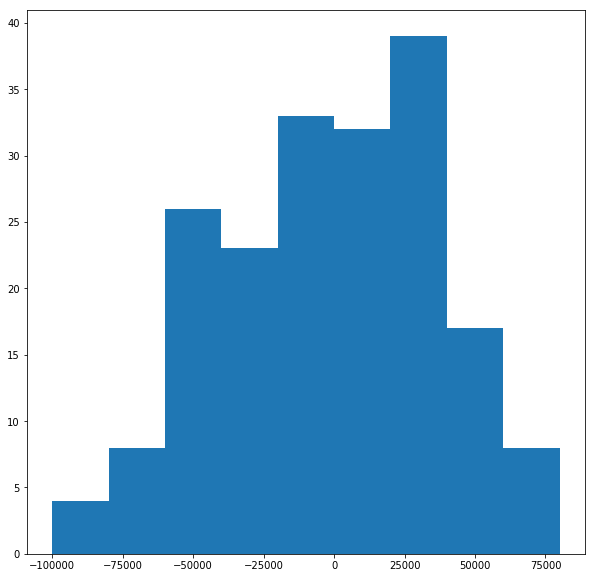

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.hist(ys - predict(weights, xs), bins=range(-100000, 100000, 20000))
plt.show()

### TODO
* Perform normalization/scaling of the data.
* Scikit-learn implementation
* Permutation of data
* !!! separation of testing and training data
* To obtain a feature from the district make it binary (yes/no)
* Build a class from it

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change algorithm.
</sup></sub></sup></sub></sup></sub>

In [ ]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

Let's plot the weights

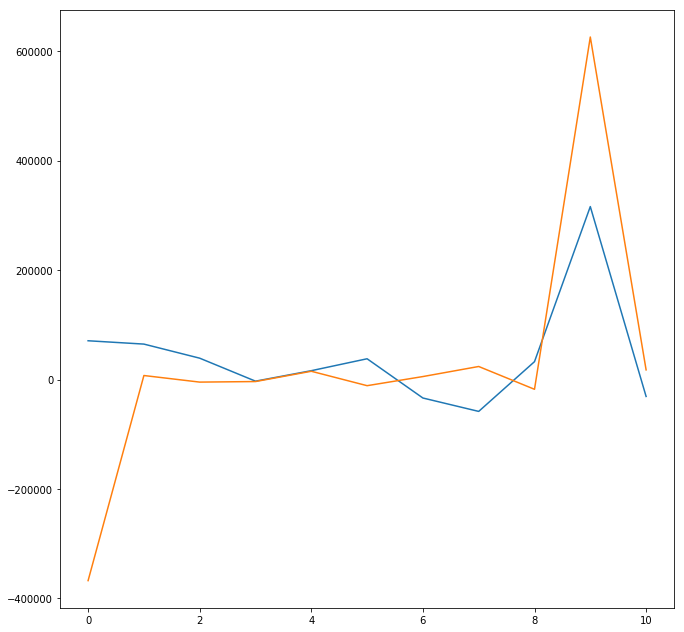

In [123]:
plt.figure(figsize=(11, 11))
plt.plot(weights)
plt.plot(scikit_weights)
plt.show()

In [124]:
testing_set = get_testing_dataset()
ys = testing_set['cena']
xs = get_features(testing_set)
print(evaluate(scikit_weights, xs, ys, regularization=False), 'Testing data loss score scikit solution')
print(evaluate(weights, xs, ys, regularization=False), 'Testing data loss score my solution')

80204.34508809487 Testing data loss score scikit solution
62212.03865440845 Testing data loss score my solution


/home/michal/Pulpit/jnp_ml/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Questions
* Problems with MSLE -> getting rid of logarithms?
* regularization

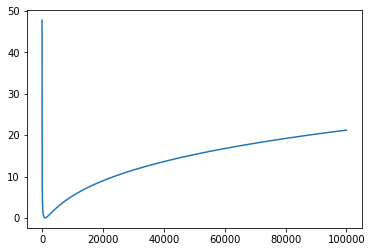

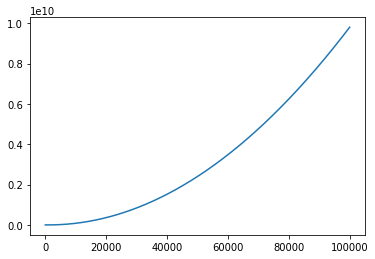

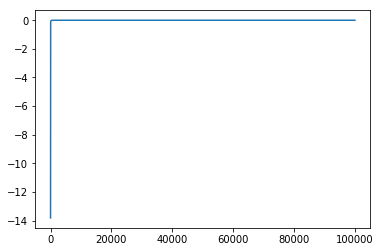

In [14]:
import matplotlib.pyplot as plt
import math

def msle(p, y):
    return (math.log(1 + y) - math.log(1 + p)) ** 2

def l2(p, y):
    return (p - y) ** 2

y = 1000
x = range(0, 100000, 10)

plt.plot(x, [msle(x_i, y) for x_i in x])
plt.show()
plt.plot(x, [l2(x_i, y) for x_i in x])
plt.show()

ps = [-2 * (math.log(1 + y) - math.log(1 + x_i)) / (1 + x_i) for x_i in x]
plt.plot(x, ps)
plt.show()